# 03_Modeling

## Imports

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, average_precision_score
import joblib

## Load data

In [76]:
df = pd.read_csv('../data/processed/windowed_dataset_cleaned.csv')
X = df[df.columns.difference(['is_attack'])]  # Features
y = df['is_attack']  # Labels

## Modeling

In [77]:
contamination = y.mean()
print(f"Contamination (proporción de ataques): {contamination:.4f}")
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=300,
    contamination=contamination, # cantidad estimada de outliers, donde pone el threeshold
    max_samples='auto', # number of samples to draw from X to train each base estimator
    random_state=42,
    n_jobs=-1 # usar todos los núcleos disponibles
)

model.fit(X)

Contamination (proporción de ataques): 0.0144


,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",300
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",np.float64(0....3663820037493)
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",-1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [78]:
df['anomaly_score'] = -model.score_samples(X)
df['anomaly_label'] = model.predict(X) == -1
print(roc_auc_score(y, df['anomaly_score']))
print(average_precision_score(y, df['anomaly_score']))

0.9997566581244547
0.9915074385048404


In [79]:
df.sort_values('anomaly_score', ascending=False).head(20)

,n_connections,id.orig_p_mean,id.orig_p_std,id.orig_p_max,id.resp_p_std,orig_bytes_mean,orig_bytes_std,orig_bytes_max,resp_bytes_mean,resp_bytes_std,...,recent_activity_score_max,recent_docker_event_mean,recent_docker_event_std,recent_docker_event_max,time_since_container_start_mean,time_since_container_start_std,time_since_container_start_max,is_attack,anomaly_score,anomaly_label
335,6.0,0.451839,21.567171,0.403767,0.0,-0.349432,85.022406,-0.116995,463.292929,4356.381717,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.770932,True
336,6.0,0.451839,21.567171,0.403767,0.0,-0.349432,85.022406,-0.116995,463.292929,4356.381717,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.770932,True
334,6.0,0.451839,21.567171,0.403767,0.0,-0.349432,85.022406,-0.116995,463.292929,4356.381717,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.770932,True
303,13.0,-0.259877,1858.960202,-0.172833,0.0,-0.343006,83.285851,-0.095528,168.379509,1992.226571,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.770758,True
302,13.0,-0.259877,1858.960202,-0.172833,0.0,-0.343006,83.285851,-0.095528,168.379509,1992.226571,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.770758,True
121,13.0,-0.592191,3588.107267,-0.341019,0.0,-0.347376,82.278541,-0.102683,316.236652,3615.472431,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.769506,True
120,13.0,-0.592191,3588.107267,-0.341019,0.0,-0.347376,82.278541,-0.102683,316.236652,3615.472431,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.769506,True
301,11.0,-0.241146,1849.474782,-0.172833,0.0,-0.330455,89.799229,-0.095528,182.316498,2104.726254,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.768675,True
326,6.0,-0.611201,17.620335,-0.619289,0.0,-0.349432,85.407706,-0.113417,463.971140,4363.623789,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.765332,True
325,6.0,-0.611201,17.620335,-0.619289,0.0,-0.349432,85.407706,-0.113417,463.971140,4363.623789,...,4.993675,-0.5,0.0,-1.0,-1.069591,0.0,-1.073349,1.0,0.765332,True


In [80]:
df.sort_values('anomaly_score').head(20)

,n_connections,id.orig_p_mean,id.orig_p_std,id.orig_p_max,id.resp_p_std,orig_bytes_mean,orig_bytes_std,orig_bytes_max,resp_bytes_mean,resp_bytes_std,...,recent_activity_score_max,recent_docker_event_mean,recent_docker_event_std,recent_docker_event_max,time_since_container_start_mean,time_since_container_start_std,time_since_container_start_max,is_attack,anomaly_score,anomaly_label
8365,0.0,-0.255592,0.0,-0.278943,0.0,0.488125,0.0,0.032916,0.373737,0.0,...,0.032655,0.5,0.0,0.0,0.368284,0.0,0.322398,0.0,0.383299,False
8366,0.0,-0.255592,0.0,-0.278943,0.0,0.488125,0.0,0.032916,0.373737,0.0,...,0.032655,0.5,0.0,0.0,0.368284,0.0,0.322398,0.0,0.383299,False
8367,0.0,-0.255592,0.0,-0.278943,0.0,0.488125,0.0,0.032916,0.373737,0.0,...,0.032655,0.5,0.0,0.0,0.368284,0.0,0.322398,0.0,0.383299,False
2670,0.0,-0.123348,0.0,-0.151673,0.0,0.487765,0.0,0.032558,0.323232,0.0,...,-0.704663,-0.5,0.0,-1.0,-0.172825,0.0,-0.202858,0.0,0.383550,False
2671,0.0,-0.123348,0.0,-0.151673,0.0,0.487765,0.0,0.032558,0.323232,0.0,...,-0.704663,-0.5,0.0,-1.0,-0.172825,0.0,-0.202858,0.0,0.383550,False
2672,0.0,-0.123348,0.0,-0.151673,0.0,0.487765,0.0,0.032558,0.323232,0.0,...,-0.704663,-0.5,0.0,-1.0,-0.172825,0.0,-0.202858,0.0,0.383550,False
20459,0.0,0.440963,0.0,0.391413,0.0,0.482368,0.0,0.027191,0.070707,0.0,...,-0.401829,0.5,0.0,0.0,-0.055757,0.0,-0.089220,0.0,0.384426,False
20461,0.0,0.440963,0.0,0.391413,0.0,0.482368,0.0,0.027191,0.070707,0.0,...,-0.401829,0.5,0.0,0.0,-0.055757,0.0,-0.089220,0.0,0.384426,False
20460,0.0,0.440963,0.0,0.391413,0.0,0.482368,0.0,0.027191,0.070707,0.0,...,-0.401829,0.5,0.0,0.0,-0.055757,0.0,-0.089220,0.0,0.384426,False
3655,0.0,-0.831787,0.0,-0.833466,0.0,-0.476970,0.0,-0.926655,0.333333,0.0,...,-0.510677,-0.5,0.0,-1.0,-0.053022,0.0,-0.086565,0.0,0.385518,False


## Visualize results

ROC AUC: 0.9998
Average Precision (PR AUC): 0.9915


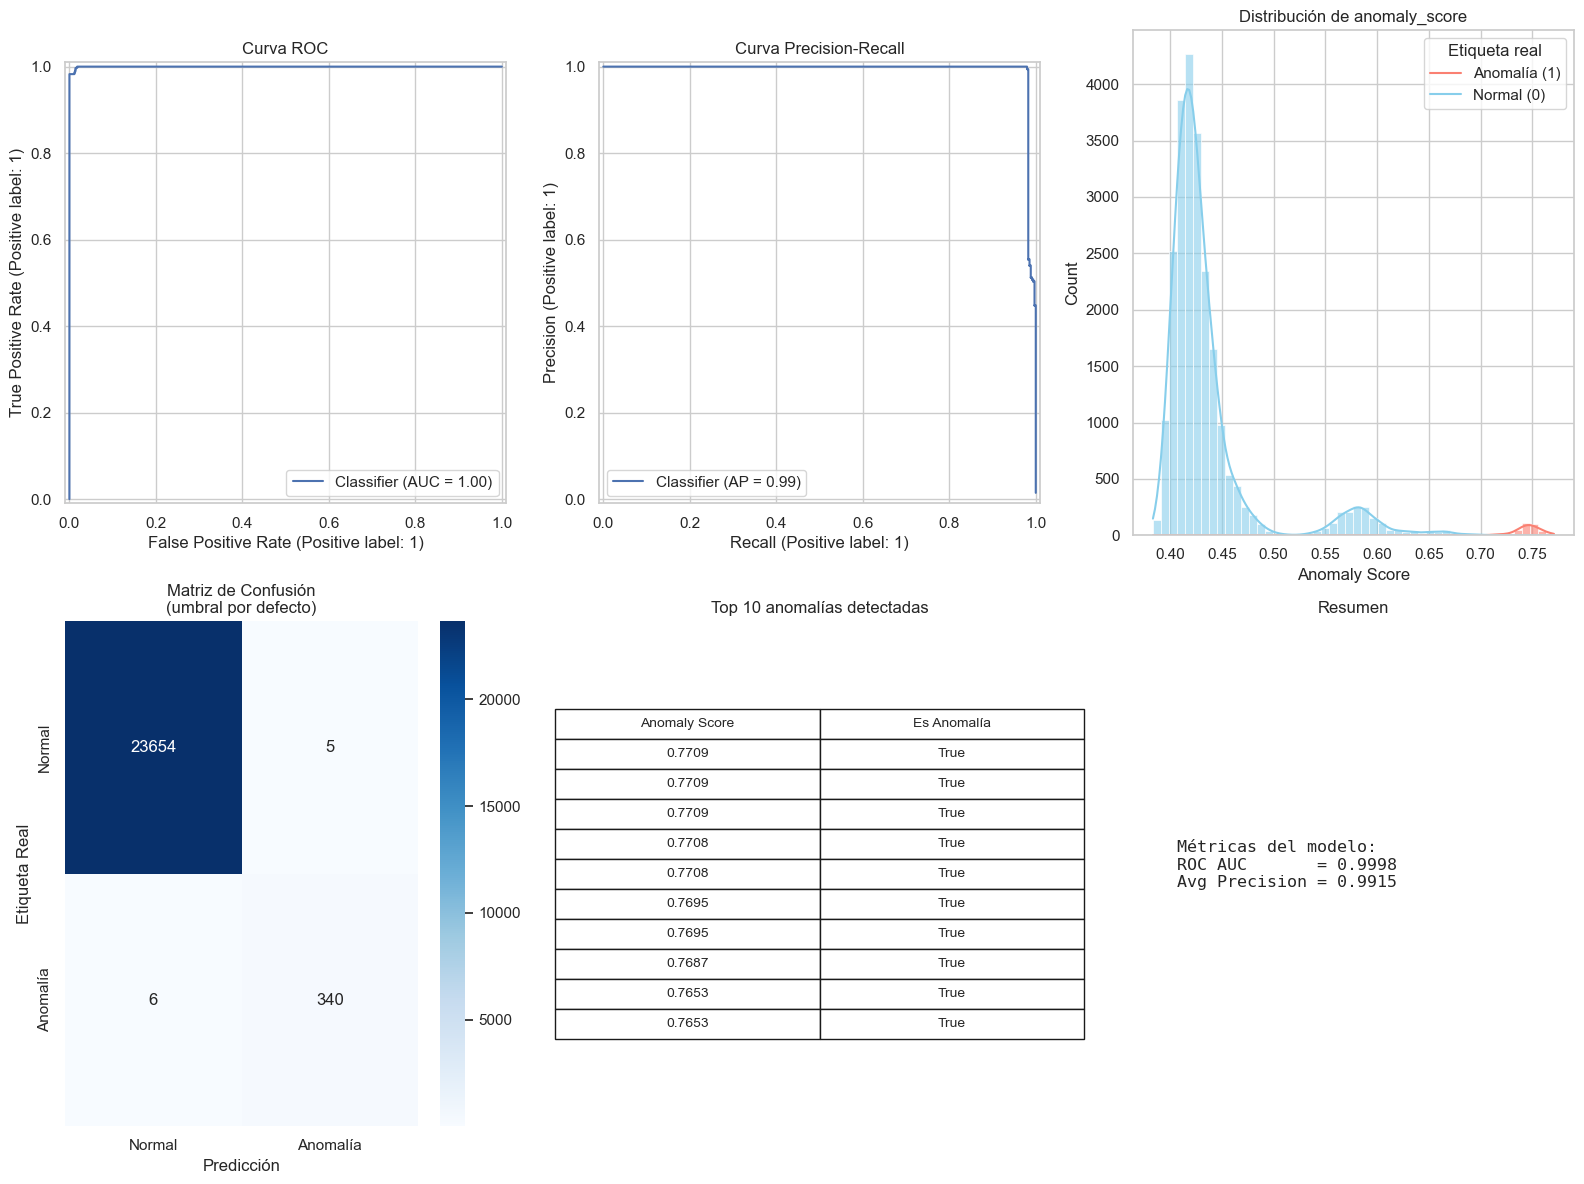

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    confusion_matrix
)
import numpy as np

# Asegúrate de que 'y' esté alineado con df (misma longitud y orden)
# y debe ser 0 = normal, 1 = anomalía

# --- Métricas ---
auc_roc = roc_auc_score(y, df['anomaly_score'])
auc_pr = average_precision_score(y, df['anomaly_score'])
print(f"ROC AUC: {auc_roc:.4f}")
print(f"Average Precision (PR AUC): {auc_pr:.4f}")

# --- Configuración de estilo ---
sns.set(style="whitegrid")
fig = plt.figure(figsize=(16, 12))

# 1. Curva ROC
ax1 = plt.subplot(2, 3, 1)
RocCurveDisplay.from_predictions(y, df['anomaly_score'], ax=ax1)
ax1.set_title('Curva ROC')

# 2. Curva Precision-Recall
ax2 = plt.subplot(2, 3, 2)
PrecisionRecallDisplay.from_predictions(y, df['anomaly_score'], ax=ax2)
ax2.set_title('Curva Precision-Recall')

# 3. Distribución del anomaly_score por clase real
ax3 = plt.subplot(2, 3, 3)
sns.histplot(
    x=df['anomaly_score'],
    hue=y,
    bins=50,
    kde=True,
    alpha=0.6,
    palette=['skyblue', 'salmon'],
    ax=ax3
)
ax3.set_title('Distribución de anomaly_score')
ax3.set_xlabel('Anomaly Score')
ax3.legend(title='Etiqueta real', labels=['Anomalía (1)','Normal (0)'])

# 4. Matriz de confusión
ax4 = plt.subplot(2, 3, 4)
cm = confusion_matrix(y, df['anomaly_label'])
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Normal', 'Anomalía'],
    yticklabels=['Normal', 'Anomalía'],
    ax=ax4
)
ax4.set_title('Matriz de Confusión\n(umbral por defecto)')
ax4.set_ylabel('Etiqueta Real')
ax4.set_xlabel('Predicción')

# 5. Top 10 anomalías (tabla simple como texto en gráfico)
ax5 = plt.subplot(2, 3, 5)
top10 = df.nlargest(10, 'anomaly_score')[['anomaly_score', 'anomaly_label']]
ax5.axis('tight')
ax5.axis('off')
table = ax5.table(
    cellText=top10.round(4).values,
    colLabels=['Anomaly Score', 'Es Anomalía'],
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
ax5.set_title('Top 10 anomalías detectadas')

# 6. Estadísticas resumen (texto)
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
stats_text = f"""Métricas del modelo:
ROC AUC       = {auc_roc:.4f}
Avg Precision = {auc_pr:.4f}
"""
ax6.text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center', family='monospace')
ax6.set_title('Resumen')

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

In [82]:
import umap
import plotly.express as px

# -----------------------------
# UMAP embedding
# -----------------------------
reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
    metric='euclidean',
    random_state=42
)

X_umap = reducer.fit_transform(X)

# Crear un DataFrame para la visualización
df_plot = pd.DataFrame({
    'UMAP1': X_umap[:, 0],
    'UMAP2': X_umap[:, 1],
    'anomaly_score': df['anomaly_score']
})

# Opcional: incluir más columnas originales para mostrar en el hover
# Por ejemplo, si quieres mostrar las primeras 5 características:
feature_cols = list(df.columns[:5])
# Asegurar que 'is_attack' esté incluido
feature_cols.append('is_attack')

df_plot = pd.concat([df_plot, df[feature_cols].reset_index(drop=True)], axis=1)

# Crear gráfico interactivo
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='anomaly_score',
    color_continuous_scale='viridis',
    hover_data=feature_cols,  # ¡esto muestra los valores al pasar el ratón!
    title="UMAP projection – colored by anomaly score",
    width=900,
    height=700
)

fig.update_traces(marker=dict(size=6, opacity=0.8))
fig.show()

/Users/taxi/miniconda3/envs/consoning/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/taxi/miniconda3/envs/consoning/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



## Save Model

In [83]:
joblib.dump(model, "../models/isolation_forest_model.joblib")

['../models/isolation_forest_model.joblib']